In [1]:
!pip install scikit-learn
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


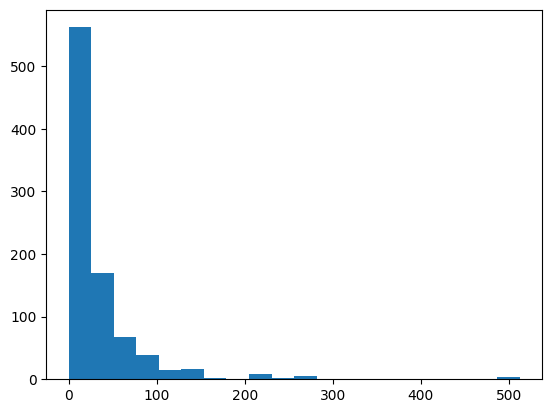

In [3]:
plt.hist(fare_values, bins=20)
plt.show()

In [4]:
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


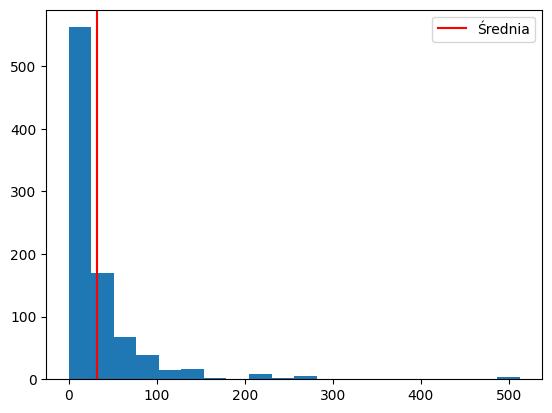

In [5]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color = 'red', label = 'Średnia')
plt.legend(loc= 'upper right')
plt.show()

In [6]:
median_fare = np.median(fare_values)
print(median_fare)

14.4542


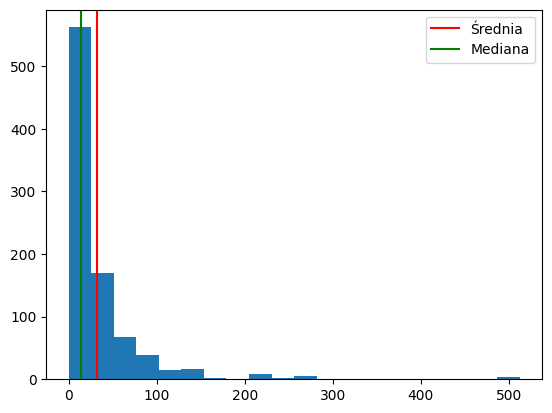

In [7]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color = 'red', label = 'Średnia')
plt.axvline(x = median_fare, color = 'green', label = 'Mediana')
plt.legend(loc = 'upper right')
plt.show()

In [8]:
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=8.05, count=43)


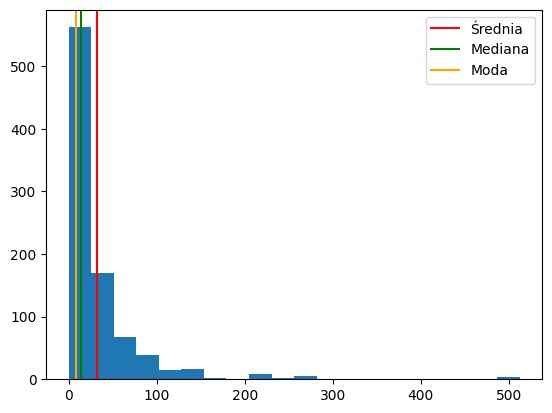

In [9]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color = 'red', label = 'Średnia')
plt.axvline(x = median_fare, color = 'green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color = 'orange', label = 'Moda')
plt.legend(loc = 'upper right')
plt.show()

In [10]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f"Q0: {q0}")
print(f"Q1: {q1}")
print(f"Q2: {median_fare}")
print(f"Q3: {q3}")
print(f"Q4: {q4}")

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


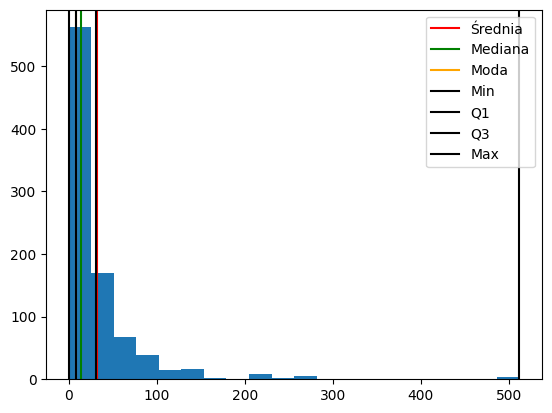

In [11]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color = 'red', label = 'Średnia')
plt.axvline(x = median_fare, color = 'green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color = 'orange', label = 'Moda')
plt.axvline(x = q0, color = 'black', label = 'Min')
plt.axvline(x = q1, color = 'black', label = 'Q1')
plt.axvline(x = q3, color = 'black', label = 'Q3')
plt.axvline(x = q4, color = 'black', label = 'Max')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# Zakres
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

In [ ]:
# Rozstęp międzykwartylowy - IQR
iqr = q3 - q1
print(iqr)

In [ ]:
plt.boxplot(fare_values)
plt.show()

In [ ]:
print("Występują wartości odstające zwłaszcza przy większych opłatach za rejs.")

In [ ]:
# wariancja
variance_fare = np.var(fare_values, ddof = 1)
print(variance_fare)

In [ ]:
# odchylenie standardowe
standard_deviation_fare = np.std(fare_values, ddof = 1)
print(standard_deviation_fare)

In [ ]:
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1, 1))
plt.hist(normalized_fare_values, bins=20)
plt.axvline(x = normalized_fare_values.mean(), color = 'red', label = 'Średnia')
plt.legend(loc = 'upper right')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')